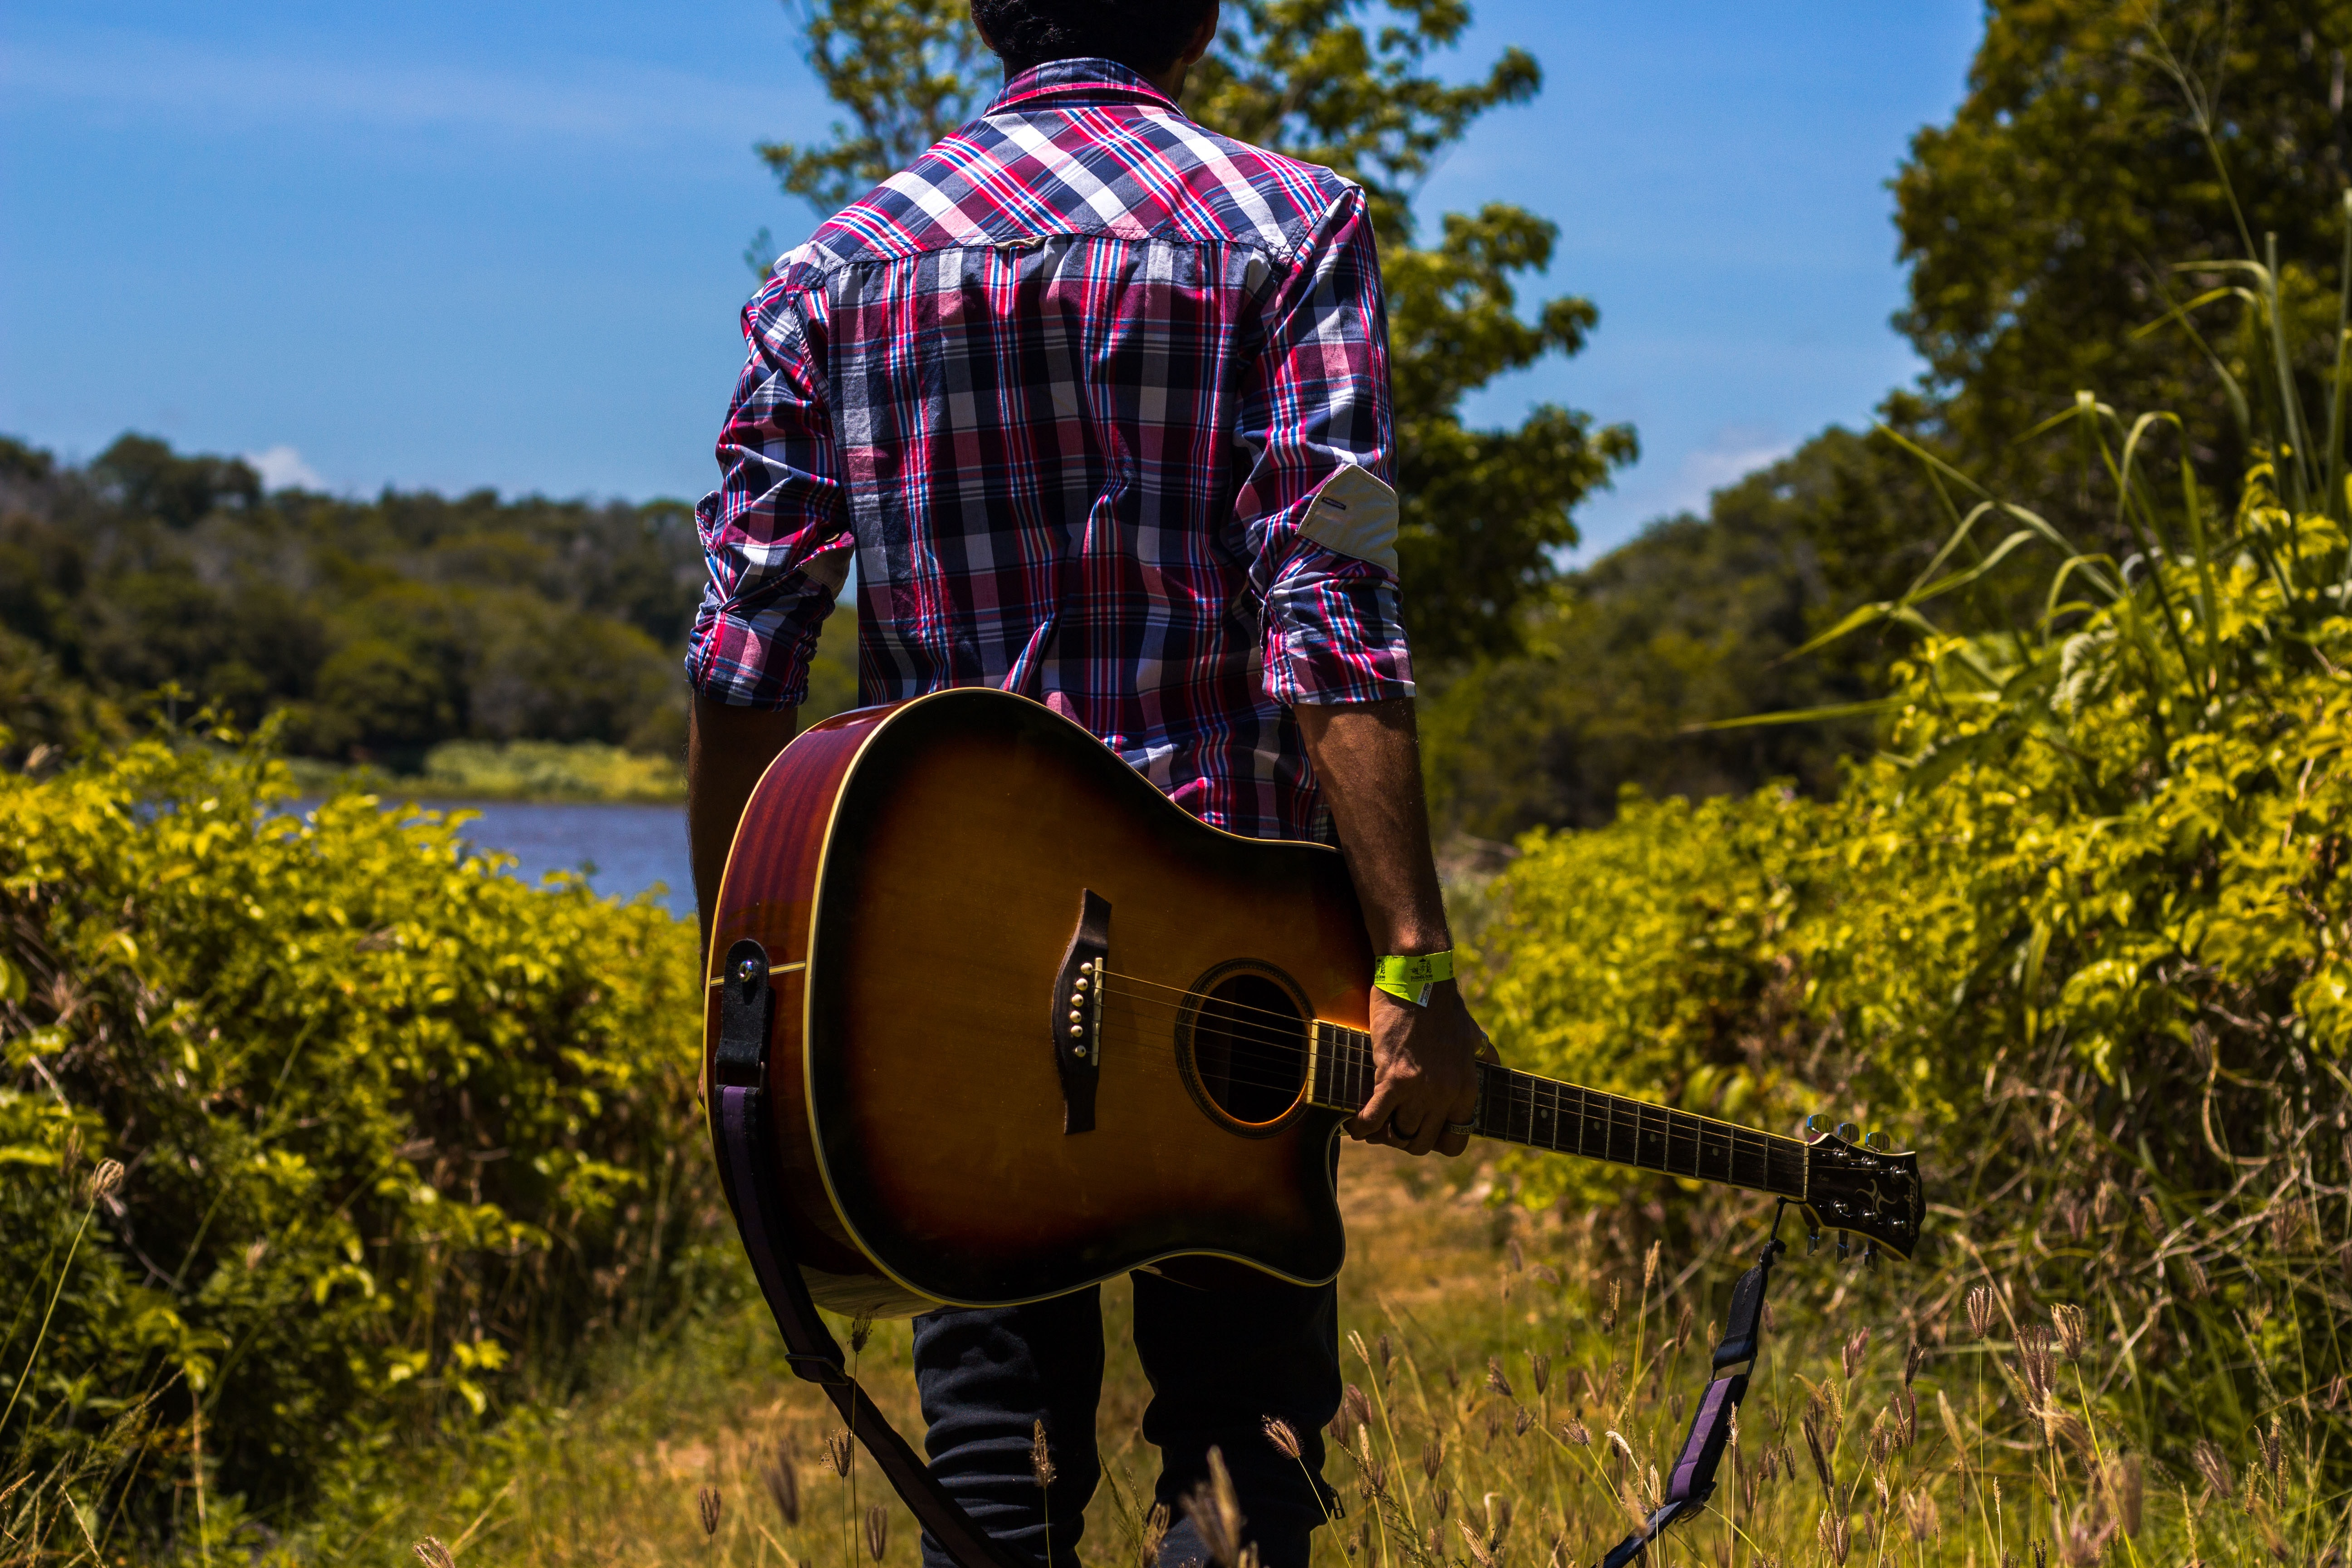

In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Extracting Feature vector and Target vector

In [2]:
import pandas as pd
data=pd.read_csv('music.csv')
data.head()

filename  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0  final_blues00.wav          0.335434         0.091088  0.130405  0.003521   
1  final_blues01.wav          0.343020         0.086142  0.112699  0.001450   
2  final_blues02.wav          0.346838         0.092210  0.132002  0.004620   
3  final_blues03.wav          0.363671         0.086856  0.132562  0.002447   
4  final_blues04.wav          0.335927         0.088291  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.285877          168244.728448              1972.723622   
1             1816.195860           90703.325185              2009.201575   
2             1788.642783          111322.537051              2085.045996   
3             1654.902168          112316.264385              1959.202709   
4             1630.737017           79648.228297              1948.459295   

   spectral_bandwidth_var  rolloff_mean  ...  mel_specgram_mean125  \
0           117298.851326   3714.477539  ...              5.875805   
1            65548.531475   3868.771221  ...              6.676786   
2            74755.260660   3995.568660  ...              6.897610   
3            83672.222326   3566.395358  ...              5.599164   
4            60221.595017   3469.910044  ...              7.565843   

   mel_specgram_var125  mel_specgram_mean126  mel_specgram_var126  \
0           121.360504              5.875805           121.360504   
1            97.969818              6.676786            97.969818   
2            69.025826              6.897610            69.025826   
3            74.678688              5.599164            74.678688   
4           126.943962              7.565843           126.943962   

   mel_specgram_mean127  mel_specgram_var127  mel_specgram_mean128  \
0              5.875805           121.360504              5.875805   
1              6.676786            97.969818              6.676786   
2              6.897610            69.025826              6.897610   
3              5.599164            74.678688              5.599164   
4              7.565843           126.943962              7.565843   

   mel_specgram_var128       tempo        label  
0           121.360504  129.199219  final_blues  
1            97.969818  123.046875  final_blues  
2            69.025826  123.046875  final_blues  
3            74.678688  123.046875  final_blues  
4           126.943962  123.046875  final_blues  

[5 rows x 343 columns]

In [3]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()


chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.335434         0.091088  0.130405  0.003521   
1          0.343020         0.086142  0.112699  0.001450   
2          0.346838         0.092210  0.132002  0.004620   
3          0.363671         0.086856  0.132562  0.002447   
4          0.335927         0.088291  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.285877          168244.728448              1972.723622   
1             1816.195860           90703.325185              2009.201575   
2             1788.642783          111322.537051              2085.045996   
3             1654.902168          112316.264385              1959.202709   
4             1630.737017           79648.228297              1948.459295   

   spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  \
0           117298.851326   3714.477539  1.080245e+06  ...   
1            65548.531475   3868.771221  6.718196e+05  ...   
2            74755.260660   3995.568660  7.958481e+05  ...   
3            83672.222326   3566.395358  9.266212e+05  ...   
4            60221.595017   3469.910044  6.102642e+05  ...   

   mel_specgram_mean125  mel_specgram_var125  mel_specgram_mean126  \
0              5.875805           121.360504              5.875805   
1              6.676786            97.969818              6.676786   
2              6.897610            69.025826              6.897610   
3              5.599164            74.678688              5.599164   
4              7.565843           126.943962              7.565843   

   mel_specgram_var126  mel_specgram_mean127  mel_specgram_var127  \
0           121.360504              5.875805           121.360504   
1            97.969818              6.676786            97.969818   
2            69.025826              6.897610            69.025826   
3            74.678688              5.599164            74.678688   
4           126.943962              7.565843           126.943962   

   mel_specgram_mean128  mel_specgram_var128       tempo        label  
0              5.875805           121.360504  129.199219  final_blues  
1              6.676786            97.969818  123.046875  final_blues  
2              6.897610            69.025826  123.046875  final_blues  
3              5.599164            74.678688  123.046875  final_blues  
4              7.565843           126.943962  123.046875  final_blues  

[5 rows x 342 columns]

In [4]:
#Checking missing values
data.isnull().sum().sum()

0

In [5]:
#Target column
target=data['label']

In [6]:
#Feature vector
feature=data.drop(columns='label',axis=1)

In [7]:
#One hot  encoding the target variable
target=pd.get_dummies(target)
target.head()

final_blues  final_classical  final_country  final_disco  final_hiphop  \
0            1                0              0            0             0   
1            1                0              0            0             0   
2            1                0              0            0             0   
3            1                0              0            0             0   
4            1                0              0            0             0   

   final_jazz  final_metal  final_pop  final_reggae  final_rock  
0           0            0          0             0           0  
1           0            0          0             0           0  
2           0            0          0             0           0  
3           0            0          0             0           0  
4           0            0          0             0           0

In [8]:
def split_transform_data(X,Y,test_size,random_state):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test=train_test_split(feature,target,test_size=test_size,random_state=random_state,stratify=target)
    print("The number of training examples is :{}\n".format(X_train.shape[0]))
    print("The number of testing  examples is :{}".format(X_test.shape[0]))
    from sklearn.preprocessing import StandardScaler
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    usable_data={
        "training_data_feature":X_train,
        "training_data_target":Y_train,
        "testing_data_feature":X_test,
        "testing_data_target":Y_test
    }
    return usable_data
    

In [9]:
usable_data=split_transform_data(feature,target,0.2,42)

The number of training examples is :8000

The number of testing  examples is :2000


In [10]:
#Training data
X_train=usable_data['training_data_feature']
Y_train=usable_data['training_data_target']
X_test=usable_data['testing_data_feature']
Y_test=usable_data['testing_data_target']

In [20]:
def train_model(X_train,Y_train,epochs,validation_split):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense,Dropout
    from tensorflow.keras.optimizers import Adam
    model=Sequential()
    model.add(Dense(512,input_shape=(341,),activation='relu'))
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    history=model.fit(x=X_train,y=Y_train,validation_split=validation_split,steps_per_epoch=20,epochs=epochs)
    validation_acc=history.history['val_accuracy'][-1]
    training_loss=history.history['loss'][-1]
    training_acc=history.history['accuracy'][-1]
    validation_loss=history.history['val_loss'][-1]
    trained_param={
        "trained_model":model,
        "training_history":history,
        "training_loss":training_loss,
        "training_acc":training_acc,
        "val_loss":validation_loss,
        "validation_acc":validation_acc
    }
    return trained_param
    

In [21]:
histo=train_model(X_train,Y_train,300,0.1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               175104    
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)              

Epoch 44/300
20/20 [==============================] - 0s 24ms/step - loss: 0.0478 - accuracy: 0.9857 - val_loss: 0.4342 - val_accuracy: 0.9275
Epoch 45/300
20/20 [==============================] - 0s 24ms/step - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.4985 - val_accuracy: 0.9137
Epoch 46/300
20/20 [==============================] - 0s 20ms/step - loss: 0.0465 - accuracy: 0.9875 - val_loss: 0.4421 - val_accuracy: 0.9100
Epoch 47/300
20/20 [==============================] - 0s 18ms/step - loss: 0.0528 - accuracy: 0.9836 - val_loss: 0.4694 - val_accuracy: 0.9087
Epoch 48/300
20/20 [==============================] - 1s 28ms/step - loss: 0.0489 - accuracy: 0.9868 - val_loss: 0.3999 - val_accuracy: 0.9212
Epoch 49/300
20/20 [==============================] - 0s 22ms/step - loss: 0.0425 - accuracy: 0.9875 - val_loss: 0.4148 - val_accuracy: 0.9300
Epoch 50/300
20/20 [==============================] - 1s 26ms/step - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.5206 - val_accuracy: 0.9150

20/20 [==============================] - 1s 26ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.3952 - val_accuracy: 0.9388
Epoch 102/300
20/20 [==============================] - 0s 25ms/step - loss: 0.0186 - accuracy: 0.9954 - val_loss: 0.3871 - val_accuracy: 0.9262
Epoch 103/300
20/20 [==============================] - 0s 22ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.4429 - val_accuracy: 0.9262
Epoch 104/300
20/20 [==============================] - 0s 19ms/step - loss: 0.0430 - accuracy: 0.9874 - val_loss: 0.4460 - val_accuracy: 0.9100
Epoch 105/300
20/20 [==============================] - 0s 18ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.3905 - val_accuracy: 0.9337
Epoch 106/300
20/20 [==============================] - 0s 19ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.5259 - val_accuracy: 0.9225
Epoch 107/300
20/20 [==============================] - 0s 18ms/step - loss: 0.0300 - accuracy: 0.9921 - val_loss: 0.3991 - val_accuracy: 0.9312
Epoch 

Epoch 158/300
20/20 [==============================] - 0s 18ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.5115 - val_accuracy: 0.9325
Epoch 159/300
20/20 [==============================] - 0s 17ms/step - loss: 0.0202 - accuracy: 0.9960 - val_loss: 0.4822 - val_accuracy: 0.9438
Epoch 160/300
20/20 [==============================] - 0s 18ms/step - loss: 0.0144 - accuracy: 0.9968 - val_loss: 0.3666 - val_accuracy: 0.9500
Epoch 161/300
20/20 [==============================] - 0s 18ms/step - loss: 0.0099 - accuracy: 0.9975 - val_loss: 0.4613 - val_accuracy: 0.9362
Epoch 162/300
20/20 [==============================] - 0s 18ms/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.4856 - val_accuracy: 0.9400
Epoch 163/300
20/20 [==============================] - 0s 18ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.4013 - val_accuracy: 0.9450
Epoch 164/300
20/20 [==============================] - 0s 17ms/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.4701 - val_accuracy:

Epoch 215/300
20/20 [==============================] - 0s 17ms/step - loss: 0.0462 - accuracy: 0.9835 - val_loss: 0.3697 - val_accuracy: 0.9362
Epoch 216/300
20/20 [==============================] - 0s 17ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.3533 - val_accuracy: 0.9375
Epoch 217/300
20/20 [==============================] - 0s 19ms/step - loss: 0.0293 - accuracy: 0.9935 - val_loss: 0.3989 - val_accuracy: 0.9362
Epoch 218/300
20/20 [==============================] - 0s 18ms/step - loss: 0.0176 - accuracy: 0.9953 - val_loss: 0.4386 - val_accuracy: 0.9300
Epoch 219/300
20/20 [==============================] - 1s 26ms/step - loss: 0.0210 - accuracy: 0.9942 - val_loss: 0.4280 - val_accuracy: 0.9350
Epoch 220/300
20/20 [==============================] - 1s 30ms/step - loss: 0.0180 - accuracy: 0.9962 - val_loss: 0.4077 - val_accuracy: 0.9463
Epoch 221/300
20/20 [==============================] - 1s 28ms/step - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.3694 - val_accuracy:

Epoch 272/300
20/20 [==============================] - 1s 25ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.4180 - val_accuracy: 0.9400
Epoch 273/300
20/20 [==============================] - 0s 25ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.4595 - val_accuracy: 0.9350
Epoch 274/300
20/20 [==============================] - 1s 25ms/step - loss: 0.0217 - accuracy: 0.9957 - val_loss: 0.4503 - val_accuracy: 0.9262
Epoch 275/300
20/20 [==============================] - 0s 20ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.3971 - val_accuracy: 0.9388
Epoch 276/300
20/20 [==============================] - 0s 20ms/step - loss: 0.0141 - accuracy: 0.9962 - val_loss: 0.4353 - val_accuracy: 0.9400
Epoch 277/300
20/20 [==============================] - 0s 20ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.4014 - val_accuracy: 0.9425
Epoch 278/300
20/20 [==============================] - 0s 23ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.4438 - val_accuracy:

# Saving the model

In [22]:
model=histo['trained_model']

In [23]:
model.evaluate(X_test,Y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.9425


[0.4595411419868469, 0.9424999952316284]

In [24]:
model.save('Final_music_94.25_test_95.00_valid_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Final_music_94.25_test_95.00_valid_model\assets


In [43]:
model.save('Final_music_94.25_test_95.00_valid_model.h5')

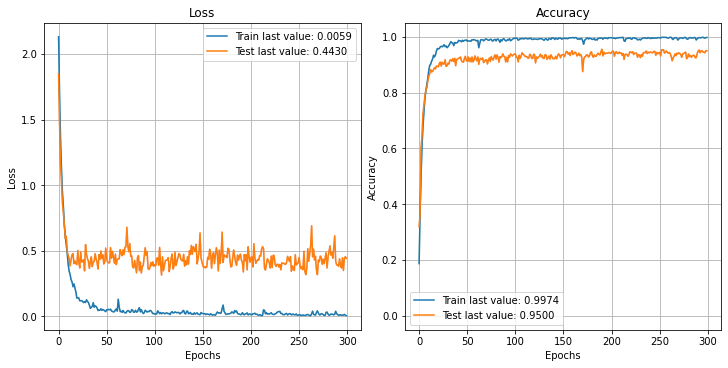

In [26]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
show_history(histo['training_history'])
plot_history(histo['training_history'], path="standard_model_final_done.png")
plt.close()

# Classification Report

In [36]:
from sklearn.metrics import classification_report

In [37]:
Y_test_int_encoded=[]
Y_test_new=np.array(Y_test)
for j in range(Y_test.shape[0]):
    Y_test_int_encoded.append(np.argmax(Y_test_new[j]))

In [38]:
predictions=model.predict(X_test)
preds=[]
for j in range(predictions.shape[0]):
    preds.append(np.argmax(predictions[j]))

In [42]:
print(classification_report(preds,Y_test_int_encoded,target_names=labels))

              precision    recall  f1-score   support

       Blues       0.97      0.97      0.97       201
   Classical       0.98      0.94      0.96       210
     Country       0.94      0.92      0.93       206
       Disco       0.95      0.96      0.95       198
      Hiphop       0.93      0.97      0.95       192
        Jazz       0.93      0.94      0.93       196
       Metal       0.96      0.96      0.96       201
         Pop       0.92      0.96      0.94       192
      Reggae       0.95      0.91      0.93       208
        Rock       0.89      0.91      0.90       196

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



# Confusion Matrix

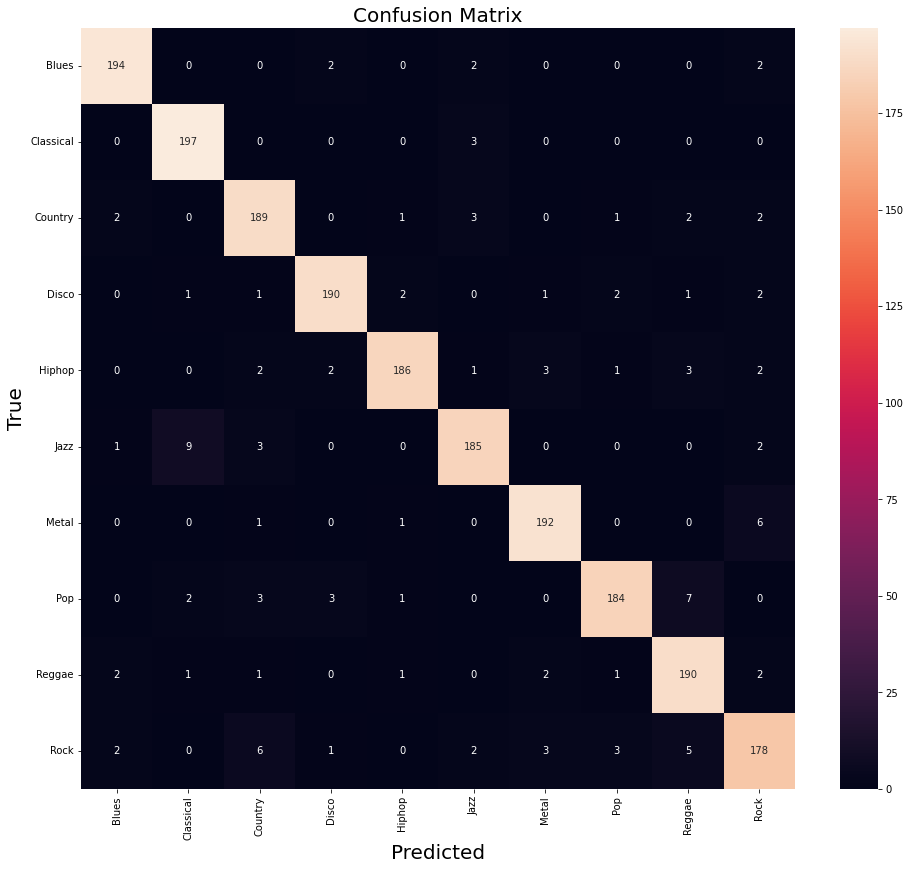

In [40]:
labels=["Blues","Classical","Country","Disco","Hiphop","Jazz","Metal","Pop","Reggae","Rock"]
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_int_encoded,preds)
#print('The confusion matrix is :\n{}'.format(cm))
import seaborn as sns
from sklearn.metrics import confusion_matrix 
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)
plt.title('Confusion Matrix', fontsize=20)
plt.show()


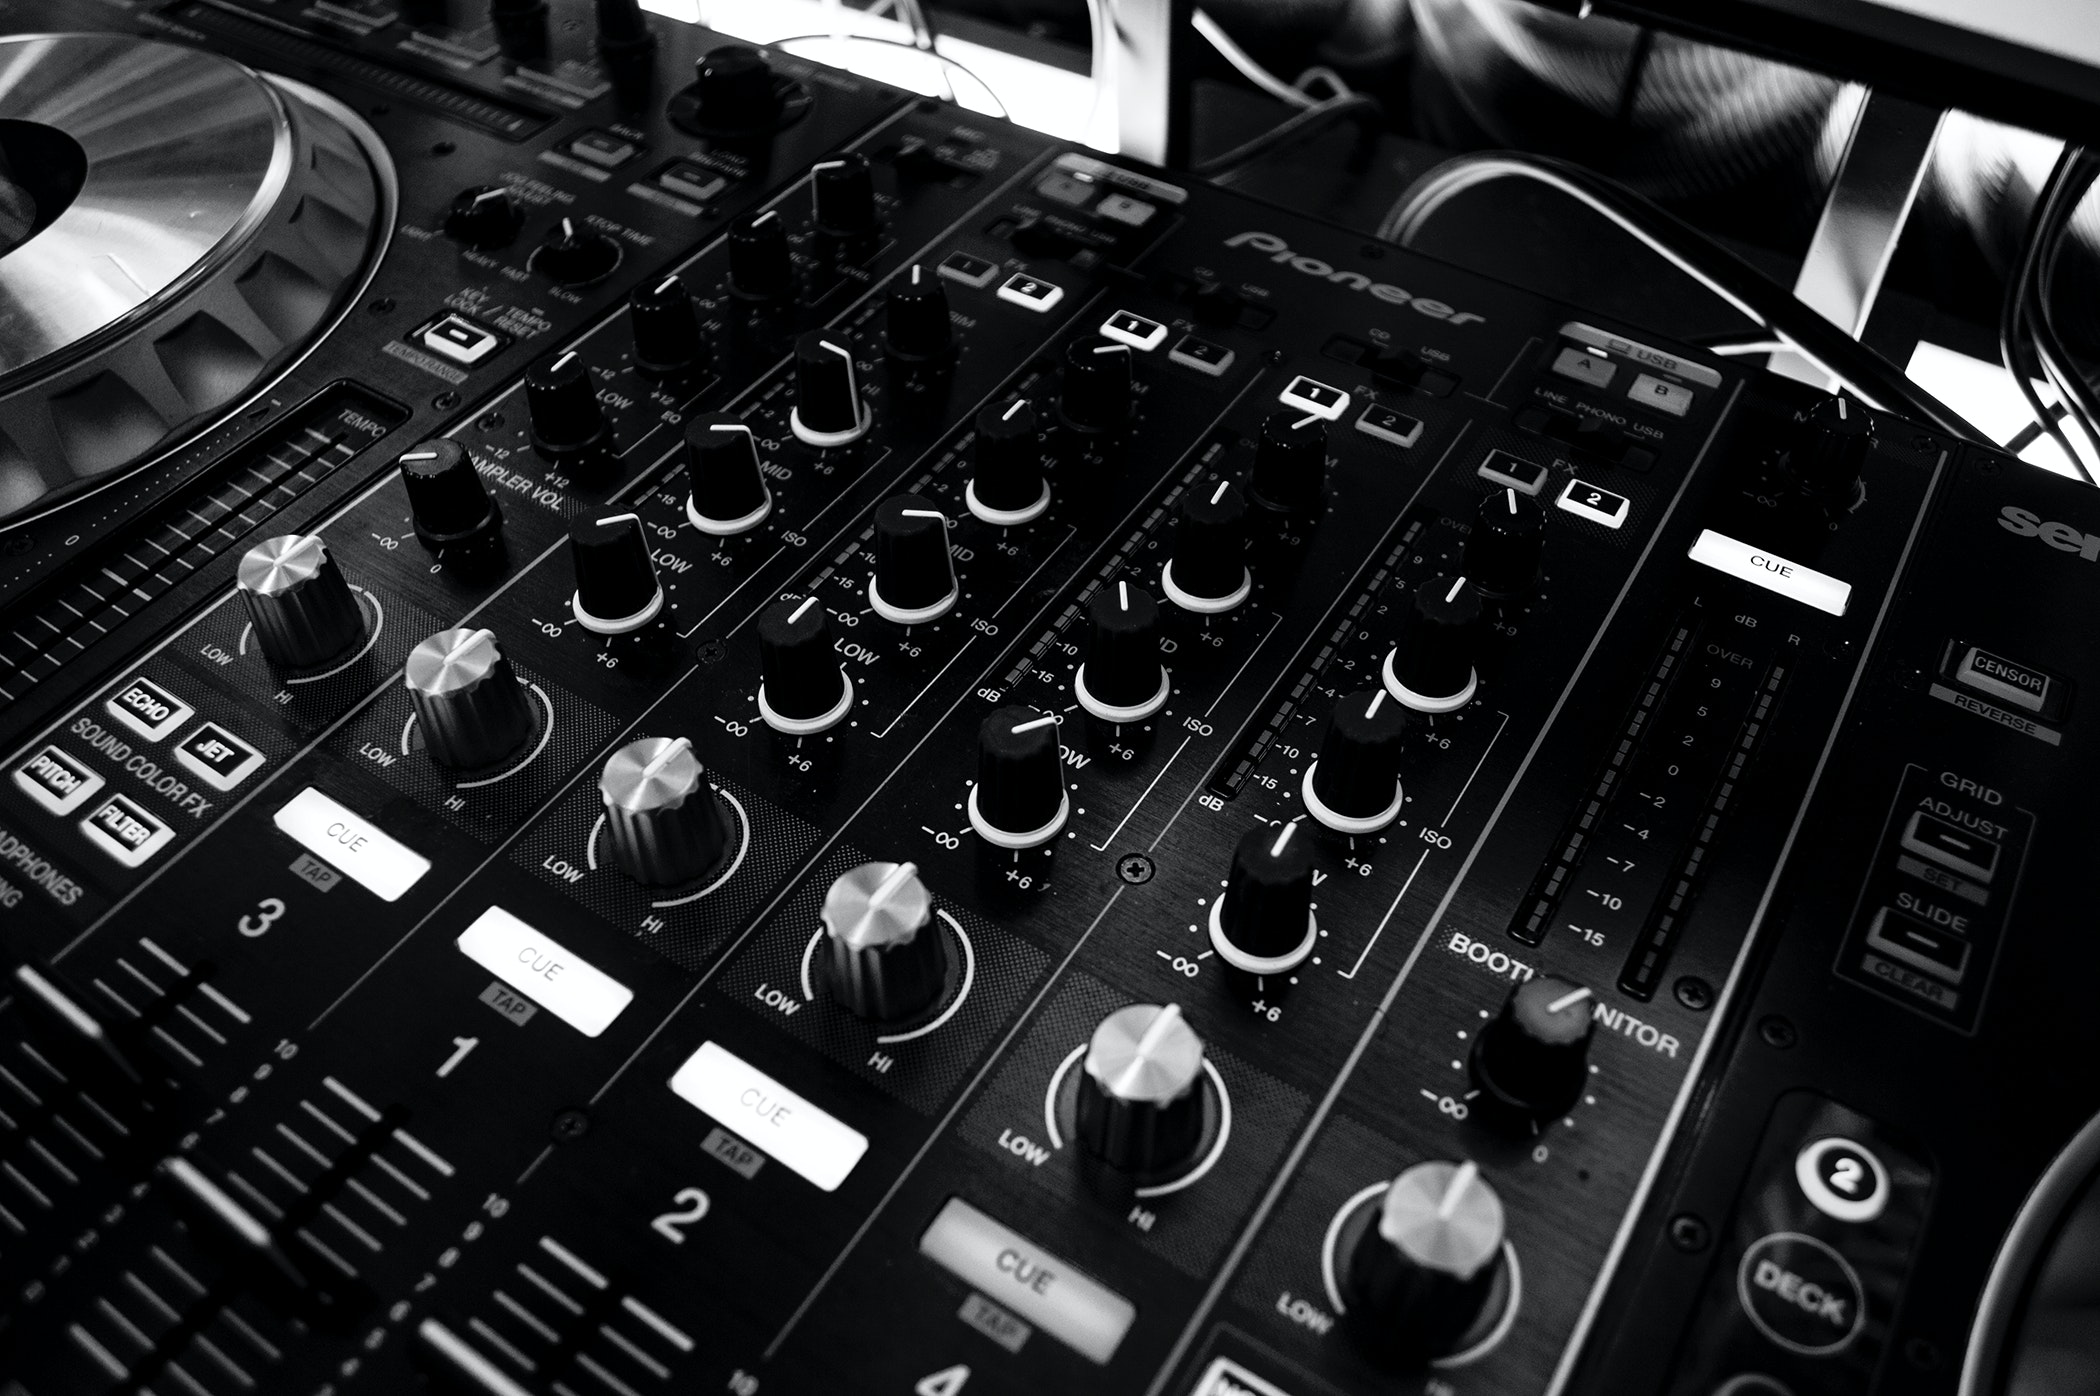